In [8]:
from models.iPINN_sfn import *
import matplotlib.pyplot as plt
import torch.utils.data as data
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.


In [9]:
u = np.load('/home/rdkeller/latentphysics/dumb_data2.npy')
data = np.load('/home/rdkeller/latentphysics/dumb_data_full.npy')


In [10]:
data.shape[1]

100

In [11]:
dt = 0.01
t_0 = 0.
t_f = 10.

t = torch.linspace(t_0, t_f, int(t_f/dt))
t= t.reshape((len(t), 1))
u = torch.tensor(u)
# x_0 = torch.tensor([0., -1., 9.])
# x_f =torch.tensor([5., 7., -3])
x_0 = u[0, :]
x_f = u[-1, :]
layers = [1, 50, 50, 3]
lambdas = [1., 1., 1.]
steps=50000
lr=0.01



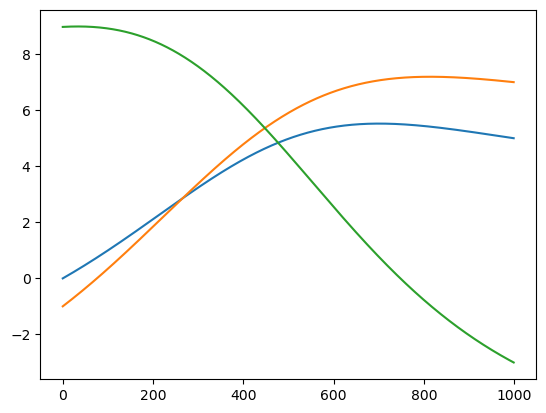

In [12]:
plt.plot(u)

In [13]:
x_0, x_f

(tensor([ 1.0708e-04, -9.9819e-01,  8.9848e+00]),
 tensor([ 5.0084,  7.0117, -3.0046]))

In [14]:
t_0, t_f = torch.tensor([t_0]), torch.tensor([t_f])
inverse_model = iPINN(layers, lambdas, t_0, t_f)
params = list(inverse_model.dnn.parameters())
optimizer = optim.Adam(params, lr=lr, eps=1e-08, betas = (0.8, 0.99), amsgrad=True)
for i in range(steps):
    optimizer.zero_grad()
    loss, loss_data, loss_ode, energy, lambda_pred = inverse_model.loss(x_0, x_f, t, u)
    loss.backward()
    optimizer.step()
    inverse_model.iter+=1
    if inverse_model.iter % 100 == 0:
        rollout = inverse_model.dnn(t).clone().detach().numpy()
        #KE = energy[0].mean()
        #PE = energy[1].mean()
        plt.clf()
        plt.plot(t.clone().detach().numpy(), rollout[:, 0], '--m', label = 'dim1')
        plt.plot(t.clone().detach().numpy(), rollout[:, 1], '--g', label = 'dim2')
        plt.plot(t.clone().detach().numpy(), rollout[:, 2], '--b', label = 'dim3')
        plt.plot(t.clone().detach().numpy(), u[:, 0], 'm')
        plt.plot(t.clone().detach().numpy(), u[:, 1], 'g')
        plt.plot(t.clone().detach().numpy(), u[:, 2], 'b')
        plt.legend()
        plt.savefig('dynamics.png')
        print(
            'epoch: %.5f, data loss: %.5f, pde loss: %.5f, Energy: %.5f,  𝜆_PINN = %s' %
            (
                inverse_model.iter,
                loss_data, 
                loss_ode,
                energy.mean(),
                str([i.item() for i in lambda_pred])
            )
        )

epoch: 100.00000, data loss: 0.01019, pde loss: 0.04006, Energy: -0.11652,  𝜆_PINN = [1.3465449810028076, 0.791178286075592, 0.8733970522880554]
epoch: 200.00000, data loss: 0.00954, pde loss: 0.00071, Energy: -0.00500,  𝜆_PINN = [1.3038792610168457, 0.7819036841392517, 0.8601133227348328]
epoch: 300.00000, data loss: 0.01080, pde loss: 0.00082, Energy: -0.00548,  𝜆_PINN = [1.2880598306655884, 0.7067952752113342, 0.8511332869529724]
epoch: 400.00000, data loss: 0.00821, pde loss: 0.00056, Energy: -0.00564,  𝜆_PINN = [1.2498462200164795, 0.7312065362930298, 0.8374439477920532]
epoch: 500.00000, data loss: 0.00664, pde loss: 0.00039, Energy: -0.00561,  𝜆_PINN = [1.2187038660049438, 0.7512056231498718, 0.8248661756515503]
epoch: 600.00000, data loss: 0.00561, pde loss: 0.00027, Energy: -0.00544,  𝜆_PINN = [1.192376732826233, 0.7680925726890564, 0.8133243918418884]
epoch: 700.00000, data loss: 0.00490, pde loss: 0.00018, Energy: -0.00520,  𝜆_PINN = [1.169319748878479, 0.7827356457710266, 0

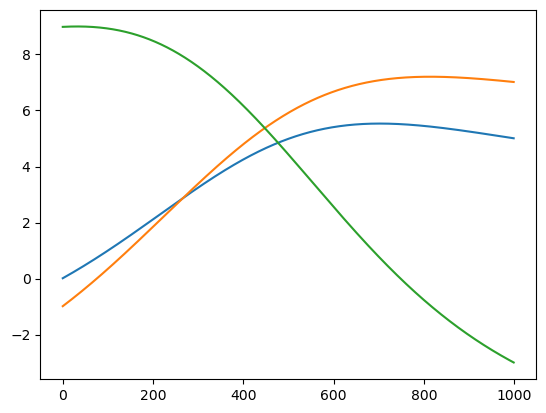

In [ ]:
rollout = inverse_model.dnn(t).clone().detach().numpy()
plt.plot(rollout)


In [ ]:
np.save('/home/rdkeller/latentphysics/data/rollout_data.npy', rollout)

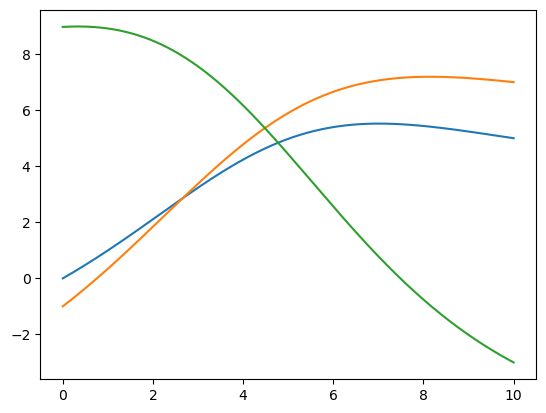

In [ ]:
plt.plot(t.detach().clone().numpy(), u)